In [4]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [3]:
from __future__ import division, print_function
import os
import tensorflow as tf

# Define dataset paths
MODEL_DATA_PATH = r'C:\Users\Prabhu\Desktop\Crack_detection\crack_detection\data'  # Replace with your actual dataset path

train_dir = os.path.join(MODEL_DATA_PATH, 'train')
validation_dir = os.path.join(MODEL_DATA_PATH, 'validation')
train_length = len(os.listdir(os.path.join(train_dir, 'crack'))) + len(os.listdir(os.path.join(train_dir, 'no_crack')))
validation_length = len(os.listdir(os.path.join(validation_dir, 'crack'))) + \
                    len(os.listdir(os.path.join(validation_dir, 'no_crack')))
batch_size = 32  # Adjust the batch size as needed

# Define data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary'
)

# Define the model (using a simple CNN for this example)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_length // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_length // batch_size
)

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_length // batch_size)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Save the trained model
model.save('crack_detection_model.h5')


Found 30000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


C:\Users\Prabhu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


C:\Users\Prabhu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 786s 834ms/step - accuracy: 0.9336 - loss: 0.1770 - val_accuracy: 0.9857 - val_loss: 0.0478
Epoch 2/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 174us/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0177
Epoch 3/15


C:\Users\Prabhu\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 484s 516ms/step - accuracy: 0.9907 - loss: 0.0328 - val_accuracy: 0.9937 - val_loss: 0.0195
Epoch 4/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 82us/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 6.6514e-04
Epoch 5/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 483s 516ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9931 - val_loss: 0.0195
Epoch 6/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 79us/step - accuracy: 0.9688 - loss: 0.0570 - val_accuracy: 1.0000 - val_loss: 0.0449
Epoch 7/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 482s 514ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9928 - val_loss: 0.0244
Epoch 8/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 93us/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0294
Epoch 9/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 485s 517ms/step - accuracy: 0.9920 - loss: 0.0256 - val_accuracy: 0.9937 - val_loss: 0.0272
Epoch 10/15
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 73us/step - accuracy: 1.0000 - loss: 1.7066e-04 

Validation Loss: 0.03051087260246277
Validation Accuracy: 0.9938902258872986


Found 30000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 476s 786ms/step - accuracy: 0.9200 - loss: 0.2099 - val_accuracy: 0.9849 - val_loss: 0.0495
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 424s 704ms/step - accuracy: 0.9855 - loss: 0.0435
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 475s 791ms/step - accuracy: 0.9937 - loss: 0.0216 - val_accuracy: 0.9715 - val_loss: 0.0844
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 422s 702ms/step - accuracy: 0.9930 - loss: 0.0216
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 446s 742ms/step - accuracy: 0.9939 - loss: 0.0174 - val_accuracy: 0.9925 - val_loss: 0.0265
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 398s 662ms/step - accuracy: 0.9961 - loss: 0.0142
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 432s 720ms/step - accuracy: 0.9972 - loss: 0.0109 - val_accuracy: 0.9940 - val_loss: 0.0200
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 398s 662ms/step - accuracy: 0.9981 - loss: 0.0071
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 432s 720ms/step - accuracy: 0.9967 - loss: 0.0114 - val_accuracy: 0.9929

200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.9936 - loss: 0.0225
Validation Loss: 0.025959061458706856
Validation Accuracy: 0.9927999973297119
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 172ms/step


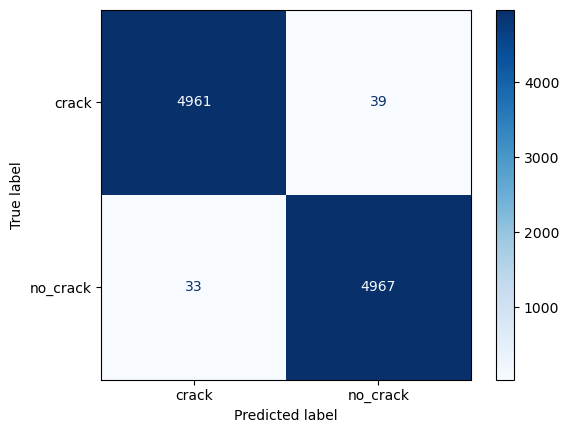

              precision    recall  f1-score   support

       crack       0.99      0.99      0.99      5000
    no_crack       0.99      0.99      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define dataset paths
MODEL_DATA_PATH = r'C:\Users\Prabhu\Desktop\Crack_detection\crack_detection\data'  # Replace with your dataset path

train_dir = os.path.join(MODEL_DATA_PATH, 'train')
validation_dir = os.path.join(MODEL_DATA_PATH, 'validation')
train_length = len(os.listdir(os.path.join(train_dir, 'crack'))) + len(os.listdir(os.path.join(train_dir, 'no_crack')))
validation_length = len(os.listdir(os.path.join(validation_dir, 'crack'))) + \
                    len(os.listdir(os.path.join(validation_dir, 'no_crack')))
batch_size = 50  # Adjust the batch size as needed

# Define data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Important for generating predictions correctly
)

# Define the model (using a simple CNN for this example)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),  # Explicit Input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_length // batch_size
)

# Save the trained model
model.save('crack_detection_model.h5')

# Evaluate the model on the validation dataset and get predictions
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_length // batch_size)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Generate predictions and true labels
y_pred = model.predict(validation_generator, steps=validation_length // batch_size)
y_pred_classes = np.round(y_pred).astype(int).flatten()  # Convert probabilities to binary labels
y_true = validation_generator.classes  # Get true labels

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))


Found 30000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 64, 64, 32)        │             864 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 64, 64, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 64, 64, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 64, 64, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 64, 64, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 64, 64, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 64, 64, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 64, 64, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 64, 64, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 64, 64, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 64, 64, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 65, 65, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 32, 32, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,278,465 (8.69 MB)

 Trainable params: 20,481 (80.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 387s 635ms/step - accuracy: 0.9869 - loss: 0.0341 - val_accuracy: 0.9975 - val_loss: 0.0108
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 378s 630ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9977 - val_loss: 0.0150
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 79us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 377s 628ms/step - accuracy: 0.9984 - loss: 0.0057 - val_accuracy: 0.9980 - val_loss: 0.0136
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 100us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 381s 635ms/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 0.9969 - val_loss: 0.0166
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 384s 640ms/step - accuracy: 0.9986 - loss: 0.0051 

200/200 ━━━━━━━━━━━━━━━━━━━━ 95s 472ms/step - accuracy: 0.9980 - loss: 0.0134
Validation Loss: 0.01501056645065546
Validation Accuracy: 0.998199999332428
200/200 ━━━━━━━━━━━━━━━━━━━━ 95s 470ms/step


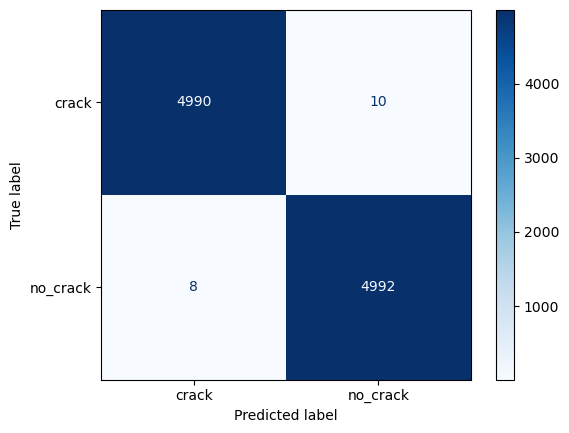

              precision    recall  f1-score   support

       crack       1.00      1.00      1.00      5000
    no_crack       1.00      1.00      1.00      5000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [11]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define dataset paths
MODEL_DATA_PATH = r'C:\Users\Prabhu\Desktop\Crack_detection\crack_detection\data'  # Replace with your dataset path

train_dir = os.path.join(MODEL_DATA_PATH, 'train')
validation_dir = os.path.join(MODEL_DATA_PATH, 'validation')
train_length = len(os.listdir(os.path.join(train_dir, 'crack'))) + len(os.listdir(os.path.join(train_dir, 'no_crack')))
validation_length = len(os.listdir(os.path.join(validation_dir, 'crack'))) + \
                    len(os.listdir(os.path.join(validation_dir, 'no_crack')))
batch_size = 50  # Adjust the batch size as needed

# Define data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Important for generating predictions correctly
)

# Load the MobileNetV2 model with pre-trained ImageNet weights, excluding the top layer
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
pretrained_model.trainable = False  # Freeze the pre-trained layers

# Add custom layers on top of MobileNetV2
x = tf.keras.layers.Flatten()(pretrained_model.output)
x = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

model_mobilenet = tf.keras.models.Model(pretrained_model.input, x)

model_mobilenet.summary()

# Compile the MobileNetV2 model
model_mobilenet.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the MobileNetV2 model
history_mobilenet = model_mobilenet.fit(
    train_generator,
    steps_per_epoch=train_length // batch_size,  # Ensure this calculation is correct
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_length // batch_size,
    verbose=1
)

# Save the MobileNetV2 model
model_mobilenet.save('crack_detection_mobilenet.h5')

# Evaluate the MobileNetV2 model on the validation dataset
val_loss, val_accuracy = model_mobilenet.evaluate(validation_generator, steps=validation_length // batch_size)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Generate predictions and true labels
y_pred = model_mobilenet.predict(validation_generator, steps=validation_length // batch_size)
y_pred_classes = np.round(y_pred).astype(int).flatten()  # Convert probabilities to binary labels
y_true = validation_generator.classes  # Get true labels

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))
